In [1]:
import random
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import time
import heapq

In [2]:
class Astar:
    def __init__(self, maze,start,end, mu = 0.5, ):
        
        self.maze = maze
        self.n,self.m = maze.shape
        self.start = start
        self.xstart, self.ystart = start
        self.end = end
        self.mu = mu
        

        #Initialise my gs
        self.gs = np.full((self.n,self.m), np.inf)
        
        self.gs[self.xstart,self.ystart] = 0

        #initialise my hs
        self.hs = np.zeros((self.n,self.m))

        for i in range(self.n):
            for j in range(self.m):
                self.hs[i,j] = self.griddist((i,j),end)
                
        
        #initialise f
        self.fs = self.mu*self.gs + (1-self.mu)*self.hs
        
        #initialise a came_from dictionary to reconstruct path at the end
        self.came_from = {}
        
        self.closed_set = set()
        
        self.open_heap = []
        heapq.heappush(self.open_heap, (self.fs[self.xstart,self.ystart], self.start))
    
    def griddist(self, current, goal):
        return abs(goal[0] - current[0]) + abs(goal[1] - current[1])
    
    def eucdist(self, current, goal):
        return np.sqrt((goal[0] - current[0])**2 + (goal[1] - current[1])**2)

    def neighbours(self,current):
        x,y = current
        neighbours = []

        if x < self.n-1 and self.maze[x + 1, y] == 1:
            neighbours.append((x+1,y))

        if y < self.m-1 and self.maze[x, y + 1] == 1:
            neighbours.append((x,y +1))

        if x > 0 and self.maze[x - 1 , y] == 1:
            neighbours.append((x-1,y))

        if y > 0 and self.maze[x,y-1] == 1:
            neighbours.append((x,y-1))

        return neighbours
    
    def reconstruct_path(self):
        path = []
        node = self.end
        while node in self.came_from:
            path.append(node)
            node = self.came_from[node]
        path.append(self.start)
        path.reverse()

        return path
    
    def search(self):
        while self.open_heap:
            f, current = heapq.heappop(self.open_heap)
            x,y = current
            
            if current in self.closed_set:
                continue
            
            self.closed_set.add(current)
            
            
            if current == self.end:
                return self.reconstruct_path()
            
            for neighbour in self.neighbours(current):
                nx, ny = neighbour
                possible_g = self.gs[x,y] + 1
                
                if possible_g < self.gs[nx,ny]:
                    self.came_from[neighbour] = current
                    self.gs[nx,ny] = possible_g
                    self.fs[nx,ny] = self.mu*possible_g + (1-self.mu)*self.hs[nx,ny]
                    
                    heapq.heappush(self.open_heap, (self.fs[nx,ny], (nx,ny)))
        return -1 # no path

Make a function to create random arrays

In [3]:
def createmaze(n,m,start,end):
    maze = np.zeros((n,m))
    
    for i in range(0,n):
        for j in range(0,m):
            rand = np.random.rand()
            if rand < 0.8:
                maze[i,j] = 1
            else:
                maze[i,j] = 0

    maze[start] = 1
    maze[end] = 1
    
    return maze

Use \astar to find the shortest path between the two corners.

In [4]:
n = 50
m = 50
start = (0,0)
end = (n-1,m-1)

maze = createmaze(n,m,start,end)

astar = Astar(maze,start,end)


path = astar.search()

print(path)



[(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4), (5, 4), (5, 5), (6, 5), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (8, 9), (8, 10), (8, 11), (8, 12), (9, 12), (9, 13), (9, 14), (9, 15), (9, 16), (9, 17), (9, 18), (10, 18), (10, 19), (11, 19), (11, 20), (11, 21), (11, 22), (11, 23), (12, 23), (12, 24), (12, 25), (13, 25), (13, 26), (13, 27), (13, 28), (13, 29), (13, 30), (13, 31), (13, 32), (14, 32), (15, 32), (15, 33), (15, 34), (16, 34), (16, 35), (17, 35), (18, 35), (19, 35), (20, 35), (21, 35), (21, 36), (21, 37), (21, 38), (21, 39), (21, 40), (22, 40), (23, 40), (24, 40), (25, 40), (26, 40), (27, 40), (28, 40), (29, 40), (30, 40), (30, 41), (30, 42), (31, 42), (32, 42), (33, 42), (34, 42), (35, 42), (36, 42), (37, 42), (37, 43), (38, 43), (38, 44), (39, 44), (39, 45), (39, 46), (40, 46), (41, 46), (42, 46), (43, 46), (44, 46), (44, 47), (45, 47), (46, 47), (46, 48), (47, 48), (47, 49), (48, 49), (49, 49)]


Make some nice plots using the pcolormesh method in matplotlib. More info can be found <a href = "https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html">here</a>.

In [5]:
from matplotlib.colors import ListedColormap

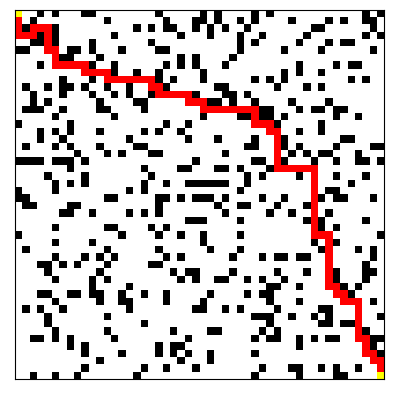

In [6]:
patharr = np.zeros((n,m))
xs, ys = zip(*path)
patharr[xs, ys] = 1

pointsarr = np.zeros((n,m))
pointsarr[start] = 1
pointsarr[end] = 1



plotarr = maze + patharr + pointsarr

fig, ax = plt.subplots()
cmap = ListedColormap(['black', 'white', 'red', 'yellow'])
mesh = plt.pcolormesh(plotarr, cmap=cmap, linewidth=0.2, vmin = 0, vmax = 3 )
ax.set_aspect('equal')
ax.invert_yaxis()
ax.set_xticks([])
ax.set_yticks([])
plt.savefig("out.png")
